In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('scores.csv')
df.head(5)

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
3,Nisal Gamage,1,74.5,63.9,7,0,76.8,1.7,Production-Ready ML Systems,100.0
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1


In [3]:
df = df[df['CourseName'] == 'Foundations of ML']
df.head(5)

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1
7,Chamath Perera,3,86.5,88.0,5,0,23.9,1.3,Foundations of ML,68.2


In [4]:
X = df['TotalHours'].values.reshape(-1, 1)
Y = df['CapstoneScore'].values

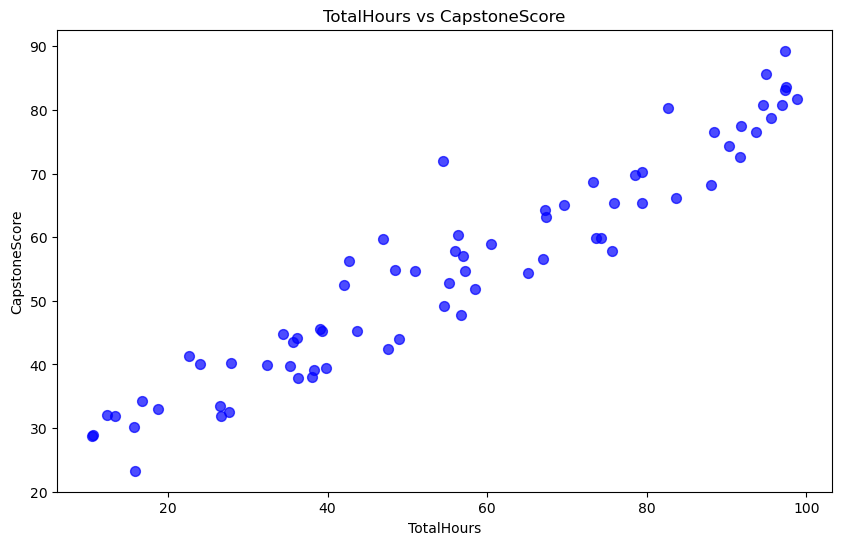

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(X, Y, alpha=0.7 , color='blue', s=50)
plt.xlabel('TotalHours')
plt.ylabel('CapstoneScore')
plt.title('TotalHours vs CapstoneScore')
plt.show()

In [33]:
""" 
X : Input feature (TotalHours)
Y : Target variable (CapstoneScore)

X : (m,n)
Y : (m,1)
beta : (beta0 , beta1)

X.dot(beta) = beta0 + beta1*X1 + beta2*X2 + ... + betan*Xn
"""

def compute_cost(X, Y, beta):
    m = len(Y)
    Y_pred = X.dot(beta)
    cost = (1/(2*m)) * np.sum((Y_pred - Y)**2)
    return cost

def gradient_descent(X, Y, beta, learning_rate, iterations):
    m = len(Y)
    cost_history = []

    for it in range(iterations):
        Y_pred = X.dot(beta)
        graditents = (1/m) * X.T.dot(Y_pred - Y)
        beta = beta - learning_rate * graditents
        
        cost_history.append(compute_cost(X, Y, beta))
        if it % 100 == 0:  # Print cost every 100 iterations
            print(f"Iteration {it}: Cost = {compute_cost(X, Y, beta)}")
        

    return beta, cost_history


In [34]:
beta = np.random.randn(2)
print(beta)

[ 0.90076875 -0.65069029]


In [35]:
learning_rate = 0.000001
iterations = 1000

In [36]:
X_with_bias = np.column_stack([np.ones((len(X))),X])
X_with_bias

array([[ 1. , 43.7],
       [ 1. , 95.6],
       [ 1. , 75.9],
       [ 1. , 24. ],
       [ 1. , 88. ],
       [ 1. , 97.3],
       [ 1. , 26.5],
       [ 1. , 57.2],
       [ 1. , 48.9],
       [ 1. , 36.2],
       [ 1. , 65.1],
       [ 1. , 22.6],
       [ 1. , 36.3],
       [ 1. , 51. ],
       [ 1. , 56.3],
       [ 1. , 15.9],
       [ 1. , 96.9],
       [ 1. , 18.8],
       [ 1. , 54.6],
       [ 1. , 91.8],
       [ 1. , 69.6],
       [ 1. , 38.1],
       [ 1. , 26.6],
       [ 1. , 97.3],
       [ 1. , 94.6],
       [ 1. , 27.6],
       [ 1. , 39.3],
       [ 1. , 34.4],
       [ 1. , 42.1],
       [ 1. , 35.3],
       [ 1. , 98.8],
       [ 1. , 27.9],
       [ 1. , 10.5],
       [ 1. , 73.6],
       [ 1. , 75.6],
       [ 1. , 79.4],
       [ 1. , 16.7],
       [ 1. , 39.8],
       [ 1. , 15.7],
       [ 1. , 67.4],
       [ 1. , 74.2],
       [ 1. , 78.5],
       [ 1. , 60.5],
       [ 1. , 79.4],
       [ 1. , 54.4],
       [ 1. , 57. ],
       [ 1. , 48.5],
       [ 1. ,

In [37]:
beta,cost_history = gradient_descent(X_with_bias, Y, beta, learning_rate, iterations)

Iteration 0: Cost = 4648.780097222206
Iteration 100: Cost = 2175.3641946978278
Iteration 200: Cost = 1031.7901818042417
Iteration 300: Cost = 503.0629043207277
Iteration 400: Cost = 258.6073970456234
Iteration 500: Cost = 145.58373236125797
Iteration 600: Cost = 93.32702050526119
Iteration 700: Cost = 69.16565057750539
Iteration 800: Cost = 57.99404238959985
Iteration 900: Cost = 52.82819525895041


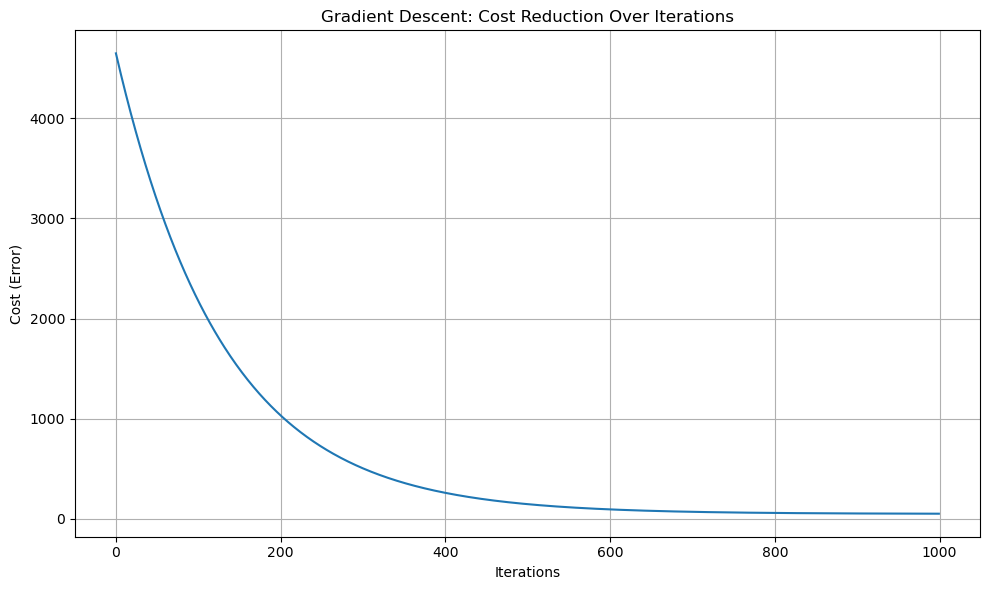

In [39]:
plt.figure(figsize=(10, 6))
# We plot the list 'cost_history' which now has 'iterations' number of items
plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (Error)")
plt.title("Gradient Descent: Cost Reduction Over Iterations")
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
print("Optimized beta:", beta)

Optimized beta: [1.69656735 0.87046731]


In [16]:
x_min, x_max = float(np.min(X)), float(np.max(X))
x_interval = np.linspace(x_min , x_max , 100)
x_interval_with_bias = np.column_stack([np.ones((len(x_interval))), x_interval])
y_hat_interval = x_interval_with_bias.dot(beta)
y_hat_interval

array([ 9.49273994, 10.31011249, 11.12748504, 11.94485759, 12.76223013,
       13.57960268, 14.39697523, 15.21434778, 16.03172032, 16.84909287,
       17.66646542, 18.48383796, 19.30121051, 20.11858306, 20.93595561,
       21.75332815, 22.5707007 , 23.38807325, 24.2054458 , 25.02281834,
       25.84019089, 26.65756344, 27.47493599, 28.29230853, 29.10968108,
       29.92705363, 30.74442618, 31.56179872, 32.37917127, 33.19654382,
       34.01391636, 34.83128891, 35.64866146, 36.46603401, 37.28340655,
       38.1007791 , 38.91815165, 39.7355242 , 40.55289674, 41.37026929,
       42.18764184, 43.00501439, 43.82238693, 44.63975948, 45.45713203,
       46.27450457, 47.09187712, 47.90924967, 48.72662222, 49.54399476,
       50.36136731, 51.17873986, 51.99611241, 52.81348495, 53.6308575 ,
       54.44823005, 55.2656026 , 56.08297514, 56.90034769, 57.71772024,
       58.53509279, 59.35246533, 60.16983788, 60.98721043, 61.80458297,
       62.62195552, 63.43932807, 64.25670062, 65.07407316, 65.89

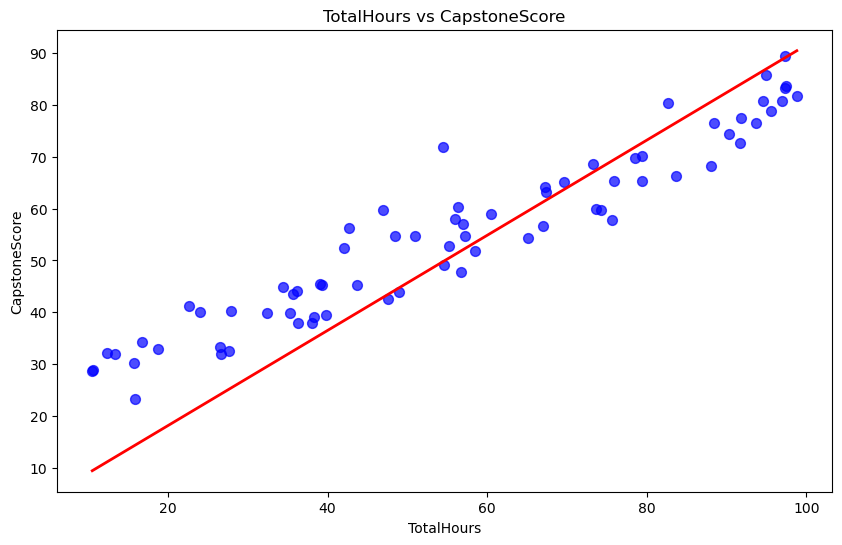

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(X, Y, alpha=0.7 , color='blue', s=50)
plt.plot(x_interval, y_hat_interval, color='red', linewidth=2)
plt.xlabel('TotalHours')
plt.ylabel('CapstoneScore')
plt.title('TotalHours vs CapstoneScore')
plt.show()